In [98]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random
import pandas as pd

In [99]:
import os
import matplotlib.pyplot as plt  # Ensure matplotlib is imported to load images

# Define the base directory for your dataset in Kaggle's input directory
dataset_dir = '/kaggle/input/satelite-images/'  # Replace with your specific folder name
imgpath = os.path.join(dataset_dir, 'ISatelitales')

# Initialize lists to store data
imag = []  # List for storing images
IDcat = []  # List for category IDs (cloud/no cloud)
IDim = []  # List for image IDs
idim = 0

# Loop through the directory and subdirectories
for ruta, carpetas, filenames in os.walk(imgpath):
    print(ruta, idim)  # Print the current directory path and image ID
    
    for filename in filenames:
        # Check if the file is in the cloud or non-cloud folder based on its path
        if ruta == os.path.join(imgpath, 'cloud'):  # Cloud folder
            IDim.append(idim)
            idim += 1
            IDcat.append(1)  # Cloud image category
        else:
            IDim.append(idim)
            idim += 1
            IDcat.append(0)  # No cloud category

        # Build the full path and read the image
        filepath = os.path.join(ruta, filename)
        imagen = plt.imread(filepath)
        imag.append(imagen)

# Print the results
#print('Total images:', idim)
#print('Cloud images:', sum(IDcat))


/kaggle/input/satelite-images/ISatelitales 0
/kaggle/input/satelite-images/ISatelitales/airplane 0
/kaggle/input/satelite-images/ISatelitales/cloud 700
/kaggle/input/satelite-images/ISatelitales/mountain 1400
/kaggle/input/satelite-images/ISatelitales/medium_residential 2100
/kaggle/input/satelite-images/ISatelitales/thermal_power_station 2800
/kaggle/input/satelite-images/ISatelitales/terrace 3500
/kaggle/input/satelite-images/ISatelitales/commercial_area 4200
/kaggle/input/satelite-images/ISatelitales/dense_residential 4900
/kaggle/input/satelite-images/ISatelitales/baseball_diamond 5600
/kaggle/input/satelite-images/ISatelitales/mobile_home_park 6300
/kaggle/input/satelite-images/ISatelitales/ship 7000
/kaggle/input/satelite-images/ISatelitales/airport 7700
/kaggle/input/satelite-images/ISatelitales/river 8400
/kaggle/input/satelite-images/ISatelitales/golf_course 9100
/kaggle/input/satelite-images/ISatelitales/roundabout 9800
/kaggle/input/satelite-images/ISatelitales/church 10500


In [100]:
cat=IDcat
imagenes=imag

**Division of the set into subsets training, validation and testing**


Cloud-free images filtering function

In [101]:
def filter_proportion(dat_set_cat, dat_set_im, rat_acept):
    Cat = []
    Im = []
    con1= 0 #counter Cloud-free images
    con2= 0 #counter cloud images
    lim = len(dat_set_cat)
    for i in range(lim) :
        if dat_set_cat[i] == 0:
            R=random.random()
            if R < rat_acept:
                con1 += 1
                Im.append(dat_set_im[i])
                Cat.append(dat_set_cat[i])

        elif dat_set_cat[i] == 1:
            con2 += 1
            Im.append(dat_set_im[i])
            Cat.append(dat_set_cat[i])


    Cat = np.array(Cat)
    Im = np.array(Im, dtype=np.uint8)
    print ('Ratio cloud images: ',con2/(con1+con2), '%')
    del dat_set_im; del dat_set_cat

    return Im, Cat


Separate the data set into data subsets

In [102]:
#subsets train-test and validation
Im,valIm1,Cat,valCat1 = train_test_split(imagenes,cat,test_size=0.3)
del imagenes; del cat;

#subsets train test
entrIm1,testIm1,entrCat1,testCat1 = train_test_split(Im,Cat,test_size=0.3)
del Im; del Cat

Filtering unclouded images from subsets

Ratio cloud images:  0.2536231884057971 %


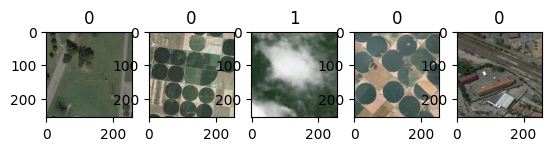

In [103]:
valIm, valCat = filter_proportion(valCat1, valIm1, rat_acept=0.07)

rows = 5 // col + 1  # Using integer division to ensure an integer result
for i in range(col):
    plt.subplot(rows, col, i + 1)
    plt.imshow(valIm[i])
    plt.title(valCat[i])

In [105]:
entrIm, entrCat = filter_proportion(entrCat1, entrIm1, rat_acept=0.05)

'''
plt.figure(figsize=(20,10))
col = 5
for i in range(col):
    plt.subplot(5/col+1,col,i+1)
    plt.imshow(entrIm[i])
    plt.title(entrCat[i])
    '''

Ratio cloud images:  0.3047945205479452 %


'\nplt.figure(figsize=(20,10))\ncol = 5\nfor i in range(col):\n    plt.subplot(5/col+1,col,i+1)\n    plt.imshow(entrIm[i])\n    plt.title(entrCat[i])\n    '

In [107]:
testIm, testCat = filter_proportion(testCat1, testIm1, rat_acept=0.025)

'''
plt.figure(figsize=(20,10))
col = 5
for i in range(col):
    plt.subplot(5/col+1,col,i+1)
    plt.imshow(testIm[i])
    plt.title(testCat[i])
    '''

Ratio cloud images:  0.46206896551724136 %


'\nplt.figure(figsize=(20,10))\ncol = 5\nfor i in range(col):\n    plt.subplot(5/col+1,col,i+1)\n    plt.imshow(testIm[i])\n    plt.title(testCat[i])\n    '

**Image processing**


All images are the same size, so the only step will be to normalize the pixel value in the arrays. This step is necessary for the best performance of the CNN.

In [108]:
valIm = valIm/ 255.
entrIm = entrIm / 255.
testIm = testIm / 255.

**Develop the CNN**

In [109]:
import keras
from keras import optimizers
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import BatchNormalization
#from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU
from keras.models import load_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

Create the CNN structure

In [110]:
modelo2 = Sequential()
modelo2.add(Conv2D(60, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(256,256,3)))
modelo2.add(MaxPooling2D((4, 4)))
modelo2.add(Conv2D(120, (3, 3), activation='relu'))
modelo2.add(MaxPooling2D((2, 2)))
modelo2.add(Dropout(0.5))
modelo2.add(Conv2D(200, (3, 3), activation='relu'))
modelo2.add(MaxPooling2D((2, 2)))
modelo2.add(Conv2D(250, (3, 3), activation='relu'))

modelo2.add(Dropout(0.5))
modelo2.add(Flatten())
modelo2.add(Dense(512, activation='relu')) #relu sería lo normal
modelo2.add(Dense(1,activation='sigmoid'))

Training the CNN

In [111]:
from keras.optimizers import RMSprop

modelo2.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

modelo2a = modelo2.fit(x=entrIm, y=entrCat, batch_size=15, epochs=10, verbose=1, validation_data=(testIm, testCat), shuffle=True)


Epoch 1/10


I0000 00:00:1731446024.332394     133 service.cc:145] XLA service 0x7b1e68004470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731446024.332458     133 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731446024.332464     133 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 5/78 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - acc: 0.6804 - loss: 0.7126

I0000 00:00:1731446032.666763     133 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


78/78 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - acc: 0.6939 - loss: 0.6406 - val_acc: 0.8241 - val_loss: 0.4566
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.8163 - loss: 0.4030 - val_acc: 0.8621 - val_loss: 0.4090
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.8551 - loss: 0.3348 - val_acc: 0.8621 - val_loss: 0.3827
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.8335 - loss: 0.3616 - val_acc: 0.8897 - val_loss: 0.3469
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.8652 - loss: 0.2990 - val_acc: 0.8828 - val_loss: 0.3578
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.8351 - loss: 0.3544 - val_acc: 0.9000 - val_loss: 0.3029
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.8655 - loss: 0.3089 - val_acc: 0.8793 - val_loss: 0.3134
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.8659 - loss: 0.3046 - val_acc: 0.8690 - val_loss: 0.3311
Epoch 9/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.8775 - loss: 

Save the Model for dyployment 

In [116]:
# Save the model in the output directory
modelo2.save("/kaggle/working/modF6.h5")

**CNN Evaluation**

In [114]:
test_eval = modelo2.evaluate(valIm, valCat, verbose=1)

print('Validation loss:', test_eval[0])
print('Validation accuracy:', test_eval[1])

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - acc: 0.9120 - loss: 0.2525
Validation loss: 0.24829931557178497
Validation accuracy: 0.9142512083053589


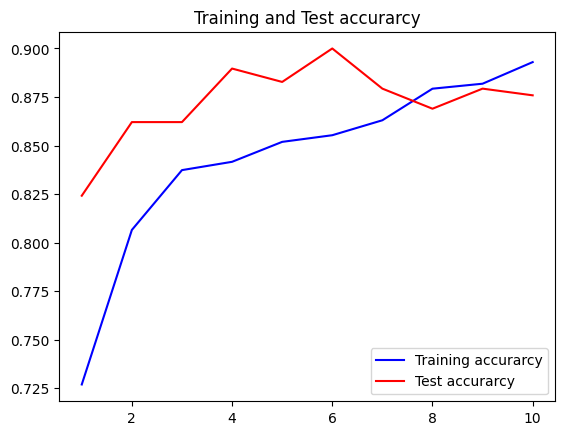

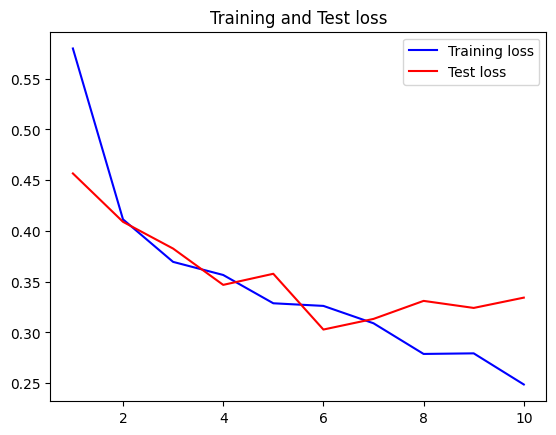

In [115]:
val_loss = modelo2a.history['val_loss'] #loss value
val_acc = modelo2a.history['val_acc'] #acc value
loss = modelo2a.history['loss'] #historical loss array
acc = modelo2a.history['acc'] #historical acc array

X1a1 = range(1, len(acc)+1)
plt.plot(X1a1, acc,'b', label='Training accurarcy')
plt.plot(X1a1, val_acc,'r', label='Test accurarcy')
plt.title('Training and Test accurarcy')
plt.legend()

plt.figure()
plt.plot(X1a1, loss, 'b', label='Training loss')
plt.plot(X1a1, val_loss, 'r',label='Test loss')
plt.title('Training and Test loss')
plt.legend()


plt.show()